
# CODE TO PREDICT CAR PURCHASING DOLLAR AMOUNT USING ANNs (REGRESSION TASK)
# Dr. Ryan Ahmed @STEMplicity
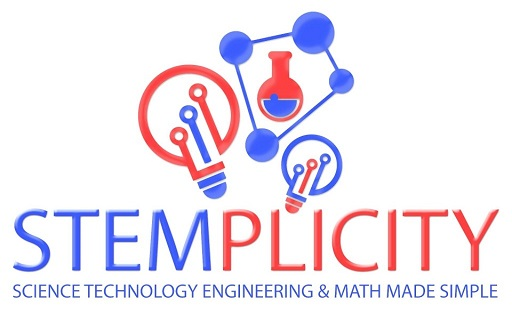



# PROBLEM STATEMENT

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
#데이터 시각화에 쓰이는 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')


In [7]:
car_df.head(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


In [8]:
car_df.tail(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
490,Jonah,augue@risusNuncac.co.uk,Myanmar,1,45.752698,63722.00164,10711.444720,316128.4002,41352.47071
491,Merrill,dolor.sit@turpisIn.com,Egypt,1,50.197205,78518.21527,10072.482980,294506.0844,52785.16947
492,Nolan,Donec.at@neccursus.co.uk,Latvia,0,55.087720,72424.80112,9831.184792,523680.7699,60117.67886
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,0,42.900187,77665.17195,13308.879320,349588.5608,47760.66427
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,0,51.767418,77345.61633,6736.751680,665099.1390,64188.26862
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [3]:
car_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


# STEP #2: VISUALIZE DATASET

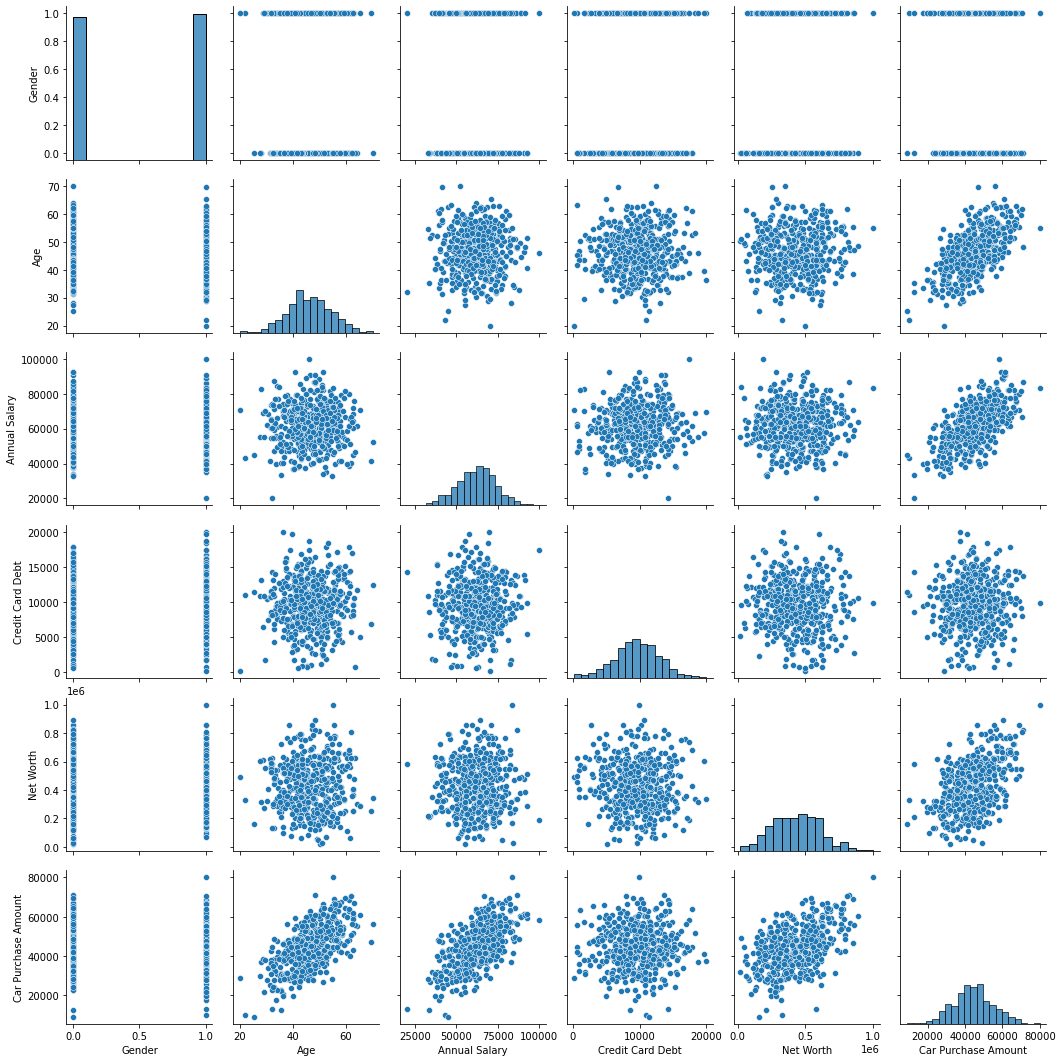

In [11]:
sns.pairplot(car_df)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [12]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1) #axis=1 모든 열을 삭제 

In [13]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [16]:
y = car_df['Car Purchase Amount']
y.shape

(500,)

In [17]:
X.shape

(500, 5)

In [15]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [20]:
X_scaled.shape

(500, 5)

In [22]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [26]:
y = y.values.reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [27]:
y_scaled = scaler.fit_transform(y)

In [28]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [21]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [29]:
print(X_scaled[:,0])

[0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.

In [12]:
y.shape

(500,)

In [30]:
y = y.values.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [14]:
y.shape

(500, 1)

In [15]:
y_scaled = scaler.fit_transform(y)


In [16]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# STEP#4: TRAINING THE MODEL

In [33]:
X_scaled.shape

(500, 5)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25) #test_size is X_test size 

In [38]:
X_train.shape

(375, 5)

In [39]:
X_test.shape

(125, 5)

In [32]:
import tensorflow.keras
from keras.models import Sequential # 신경망을 순차적으로 실행 
from keras.layers import Dense #완전 연결 인공신경망 
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu')) #input_dim 입력 열 개수 
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()


ModuleNotFoundError: No module named 'tensorflow'

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [20]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)


Train on 300 samples, validate on 75 samples
Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0844 - val_loss: 0.0198
Epoch 2/20
300/300 [==============================] - 0s 47us/step - loss: 0.0132 - val_loss: 0.0138
Epoch 3/20
300/300 [==============================] - 0s 40us/step - loss: 0.0113 - val_loss: 0.0088
Epoch 4/20
300/300 [==============================] - 0s 40us/step - loss: 0.0067 - val_loss: 0.0064
Epoch 5/20
300/300 [==============================] - 0s 43us/step - loss: 0.0061 - val_loss: 0.0057
Epoch 6/20
300/300 [==============================] - 0s 40us/step - loss: 0.0050 - val_loss: 0.0054
Epoch 7/20
300/300 [==============================] - 0s 40us/step - loss: 0.0042 - val_loss: 0.0046
Epoch 8/20
300/300 [==============================] - 0s 43us/step - loss: 0.0034 - val_loss: 0.0039
Epoch 9/20
300/300 [==============================] - 0s 40us/step - loss: 0.0030 - val_loss: 0.0035
Epoch 10/20
300/300 [==========================

# STEP#5: EVALUATING THE MODEL 

In [21]:
print(epochs_hist.history.keys())


dict_keys(['val_loss', 'loss'])


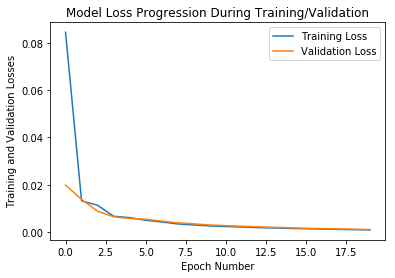

In [22]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [23]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth

X_Testing = np.array([[1, 50, 50000, 10985, 629312]])

In [24]:
y_predict = model.predict(X_Testing)
y_predict.shape

(1, 1)

In [25]:
print('Expected Purchase Amount=', y_predict[:,0])

Expected Purchase Amount= [226242.23]


# EXCELLENT JOB! NOW YOU'VE MASTERED THE USE OF ANNs FOR REGRESSION TASKS! 